C:\Users\Airly\AppData\Local\Temp\ipykernel_28732\2048983445.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states_gdf["centroid"] = states_gdf.geometry.centroid
C:\Users\Airly\AppData\Local\Temp\ipykernel_28732\2048983445.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states_gdf["x"] = states_gdf.centroid.x
C:\Users\Airly\AppData\Local\Temp\ipykernel_28732\2048983445.py:32: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states_gdf["y"] = states_gdf.centroid.y


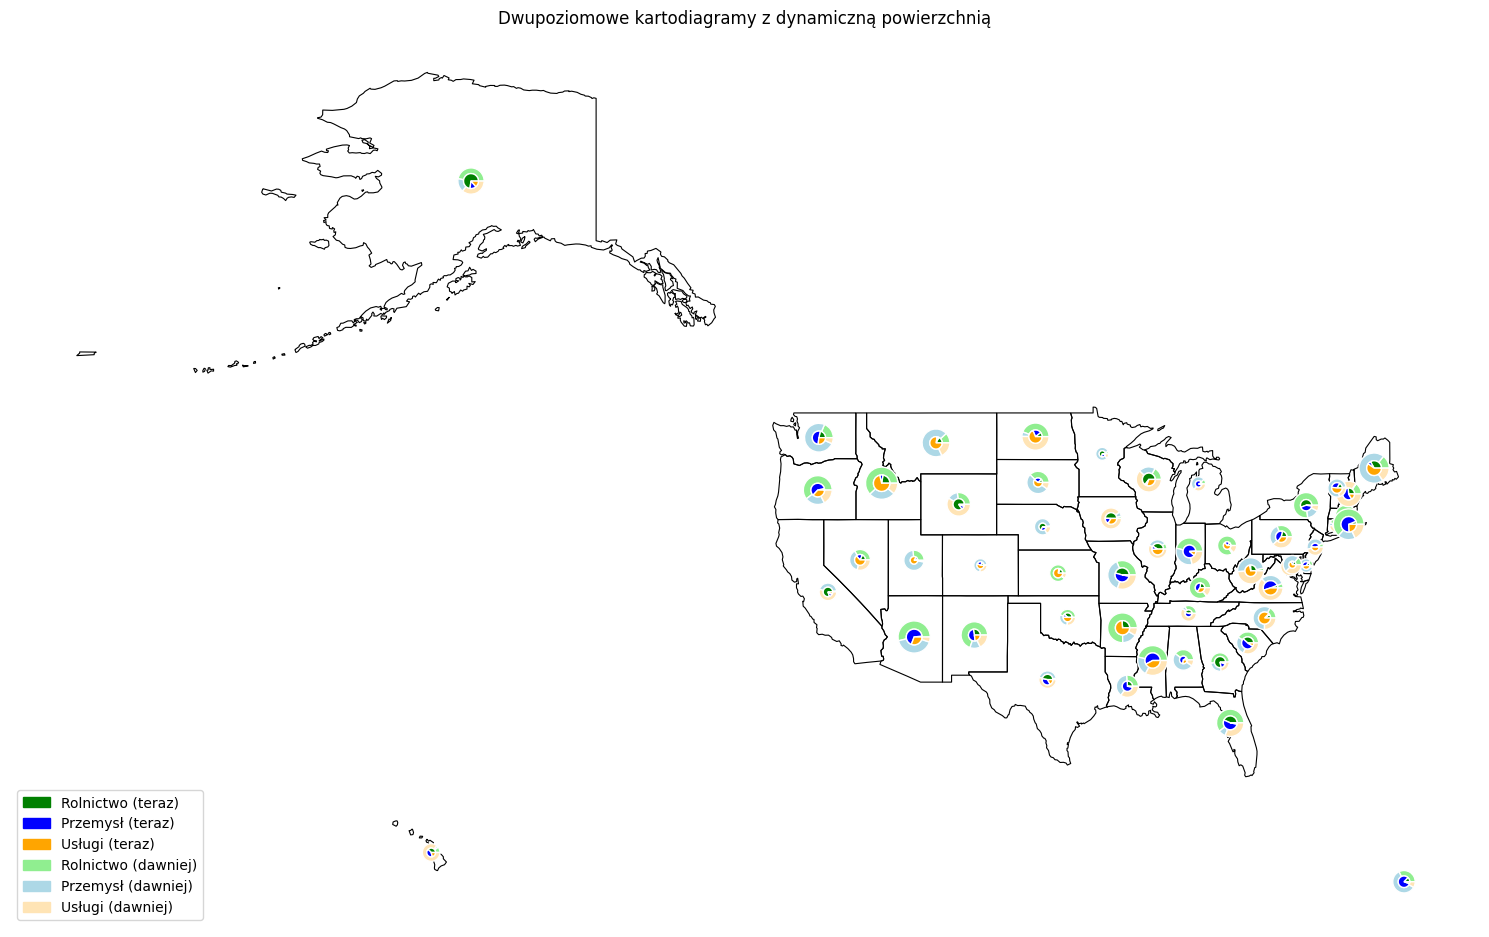

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

states_gdf = gpd.read_file(r"d:\GIS\us-states.json")

# Losowe dane
np.random.seed(42)
now = np.random.dirichlet(np.ones(3), size=len(states_gdf))
past = np.random.dirichlet(np.ones(3), size=len(states_gdf))
size_inner = np.random.uniform(0.3, 1.0, size=len(states_gdf))
size_outer = np.random.uniform(0.3, 1.0, size=len(states_gdf))

# Dodanie do ramki danych
df = pd.DataFrame({
    "State": states_gdf["name"],
    "Agriculture": now[:, 0],
    "Industry": now[:, 1],
    "Services": now[:, 2],
    "Agriculture2": past[:, 0],
    "Industry2": past[:, 1],
    "Services2": past[:, 2],
    "size_inner": size_inner,
    "size_outer": size_outer
})

states_gdf = states_gdf.set_index("name").join(df.set_index("State"))
states_gdf["centroid"] = states_gdf.geometry.centroid
states_gdf["x"] = states_gdf.centroid.x
states_gdf["y"] = states_gdf.centroid.y

# Rysowanie
fig, ax = plt.subplots(figsize=(15, 10))
states_gdf.geometry.boundary.plot(ax=ax, linewidth=0.8, color='black')

for _, row in states_gdf.iterrows():
    inner = [row['Agriculture'], row['Industry'], row['Services']]
    outer = [row['Agriculture2'], row['Industry2'], row['Services2']]
    x, y = row['x'], row['y']

    radius_inner = np.sqrt(row['size_inner'])
    radius_outer = np.sqrt(row['size_outer']) + radius_inner

    size = radius_outer * 1.0
    pie_ax = ax.inset_axes([x - size / 2, y - size / 2, size, size], transform=ax.transData)

    pie_ax.pie(outer, radius=radius_outer,
               colors=["lightgreen", "lightblue", "moccasin"],
               wedgeprops=dict(width=radius_outer - radius_inner, edgecolor='white'))

    pie_ax.pie(inner, radius=radius_inner,
               colors=["green", "blue", "orange"],
               wedgeprops=dict(width=radius_inner, edgecolor='white'))

    pie_ax.set_aspect('equal')
    pie_ax.axis('off')

# Legenda
patches = [
    mpatches.Patch(color='green', label='Rolnictwo (teraz)'),
    mpatches.Patch(color='blue', label='Przemysł (teraz)'),
    mpatches.Patch(color='orange', label='Usługi (teraz)'),
    mpatches.Patch(color='lightgreen', label='Rolnictwo (dawniej)'),
    mpatches.Patch(color='lightblue', label='Przemysł (dawniej)'),
    mpatches.Patch(color='moccasin', label='Usługi (dawniej)'),
]
ax.legend(handles=patches, loc='lower left')
ax.set_title("Dwupoziomowe kartodiagramy z dynamiczną powierzchnią")
ax.axis('off')
plt.tight_layout()
plt.show()
